<a href="https://colab.research.google.com/github/Byeon-MJ/Computer_Vision_Project/blob/main/Image_Face_Detection_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!git clone https://github.com/gopinath-balu/computer_vision

Cloning into 'computer_vision'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 13 (delta 0), reused 6 (delta 0), pack-reused 7
Unpacking objects: 100% (13/13), done.


In [3]:
# # 파일 복사
# !cp /content/computer_vision/CAFFE_DNN/deploy.prototxt.txt /content/gdrive/MyDrive/CV/Face\ Detection/data
# !cp /content/computer_vision/CAFFE_DNN/res10_300x300_ssd_iter_140000.caffemodel /content/gdrive/MyDrive/CV/Face\ Detection/data
# print('files copy complete!!')

In [4]:
# # 다운받은 파일 삭제
# !rm -r computer_vision

In [5]:
# 모듈 임포트
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [8]:
# DNN 학습 모델(caffemodel) 사용 정의
model_name = '/content/computer_vision/CAFFE_DNN/res10_300x300_ssd_iter_140000.caffemodel'

In [9]:
# 모델의 네트워크 구성 파일 정의
prototxt_name = '/content/computer_vision/CAFFE_DNN/deploy.prototxt.txt'

In [10]:
# Detection 인정 신뢰도 정의
min_confidence = 0.3

In [11]:
# 원본 이미지 정의
file_name = '/content/gdrive/MyDrive/CV/Face Detection/data/image/face_04.jpg'

In [12]:
# width size 지정
frame_width = 700

In [13]:
# Detection & Display 함수 정의
def detectAndDisplay(frame):
    # frame_width 에 맞춰 image resize
    (height, width) = frame.shape[:2]
    ratio = frame_width / width
    dimension = (frame_width, int(height * ratio))
    frame = cv2.resize(frame, dimension, interpolation = cv2.INTER_AREA)

    # caffemodel의 weight 값과 모델 네트워크 구성을 불러와서 모델 정의
    model = cv2.dnn.readNetFromCaffe(prototxt_name, model_name)

    # 이미지를 300 x 300으로 size 조정, blob 생성
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
                                 (300, 300), (104.0, 177.0, 123.0))
    
    # blob을 모델에 넣는다
    model.setInput(blob)

    # detection 수행
    detections = model.forward()

    # detection 수만큼 루프
    for i in range(0, detections.shape[2]):
        
        confidence = detections[0, 0, i, 2]     # confidence는 detection한 확률을 나타냄

        # min_confidence 보다 큰 경우에만 detection으로 인정함
        if confidence > min_confidence:
            # detection 된 영역을 boxing
            # 상대적 좌표 * np.array([width, height, width, height])
            # 절대적인 boxing 좌표를 구해낸다.
            box = detections[0, 0, i, 3:7] * np.array([frame_width, int(height * ratio), frame_width, int(height * ratio)])

            (startX, startY, endX, endY) = box.astype('int')
            print(confidence, startX, startY, endX, endY)

            # 얼굴에 bounding box(사각형)를 그리고 확률값도 함께 나타낸다.
            text = '{:.2f}%'.format(confidence * 100)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)
            cv2.putText(frame, text, (startX, y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
            
    # show the output image
    print('# # # # Face detection(DNN_CAFEE) # # # #')
    # 이미지 display
    cv2_imshow(frame)

width: 700 pixels
height: 400 pixels
channels: 3
# # # # Original Image # # # #


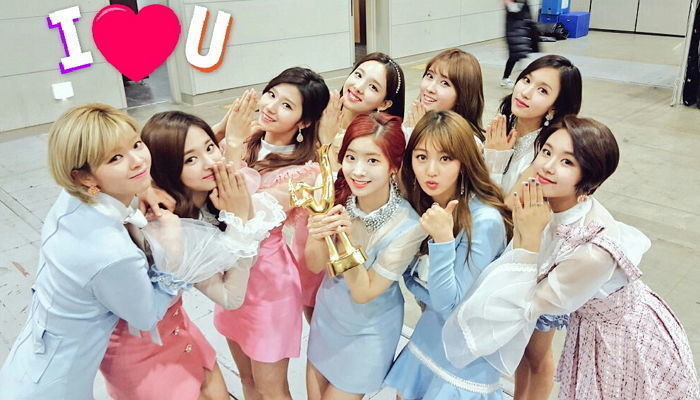

In [14]:
# 원본 이미지 Display
img = cv2.imread(file_name)
print('width: {} pixels'.format(img.shape[1]))
print('height: {} pixels'.format(img.shape[0]))
print('channels: {}'.format(img.shape[2]))

(height, width) = img.shape[:2]

print('# # # # Original Image # # # #')
cv2_imshow(img)

0.9974694 342 136 388 196
0.98542583 412 127 459 199
0.96982735 512 62 561 119
0.9614696 92 127 150 194
0.6099852 533 128 583 198
0.59733295 258 80 304 134
0.5086096 414 61 457 112
0.471188 177 131 222 191
0.38290343 345 61 386 111
# # # # Face detection(DNN_CAFEE) # # # #


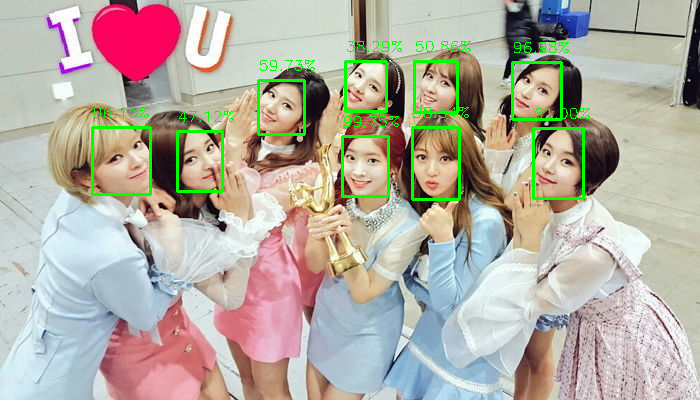

In [15]:
detectAndDisplay(img)

### DNN Module Face Detection
- detection 속도는 느리나 정확도가 높다.
- 얼굴이 정면이 아닌 돌려져 있어도 인식률 높음
- 이미지의 크기(해상도)가 작아져도 인식률 높음